In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly

import plotly.graph_objects as go


df_chiangmai_grid = pd.read_parquet(r'../data/df_chiangmai_grid.parquet')
df_chiangmai_dem = pd.read_parquet(r'..\data\df_chiangmai_dem.parquet')
df_chiangmai_joined = df_chiangmai_grid.merge(df_chiangmai_dem, how='inner', left_index=True, right_index=True)
df_chiangmai_joined


df_chiangmai_joined['x'] = df_chiangmai_joined['lat']*111
df_chiangmai_joined['x'] = df_chiangmai_joined['x'] - df_chiangmai_joined['x'].min()
df_chiangmai_joined['y'] = df_chiangmai_joined['lon']*111
df_chiangmai_joined['y'] = df_chiangmai_joined['y'] - df_chiangmai_joined['y'].min()
df_chiangmai_joined['z'] = df_chiangmai_joined['dem']/1000
df_chiangmai_joined['z'] = df_chiangmai_joined['z'] - df_chiangmai_joined['z'].min()


In [2]:
df_predict_pm25_monthly = pd.read_parquet(r'../data/df_predict_pm25_monthly.parquet')

In [4]:
df_tmp = df_predict_pm25_monthly.iloc[:, [0]].reset_index()
df_tmp.columns = ['lat', 'lon', 'dem', 'pm25']
z_data = df_tmp.pivot_table(values='dem', index='lat', columns='lon', aggfunc='mean')
pm25_data = df_tmp.pivot_table(values='pm25', index='lat', columns='lon', aggfunc='mean')
assert(z_data.shape == pm25_data.shape)
x = z_data.columns.to_list()
y = z_data.index.to_list()
# nrows, ncols = z_data.shape
# if ncols <= nrows:
#     pad_size = round((nrows-ncols)/2)
#     z_data = np.pad(z_data, pad_width=((0, 0), (pad_size, pad_size)),mode='constant', constant_values=np.nan)
#     pm25_data = np.pad(pm25_data, pad_width=((0, 0), (pad_size, pad_size)),mode='constant', constant_values=np.nan)    
# plt.imshow(np.flip(pm25_data, axis=0))


In [5]:
z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, surfacecolor=pm25_data.values)])
fig.update_layout(
    title='Chiangmai PM2.5', autosize=False,
    width=500, height=500,
    margin=dict(l=0, r=0, b=65, t=90),
    xaxis_range=[-4,4],
    yaxis_range=[-4,4],
    zaxis_range=[-4,4],
    )
fig.XAxis
fig.show()


NameError: name 'go' is not defined

# DEV

In [ ]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_3d(df_tmp, x="lon", y="lat", z="dem", color="pm25", size="pm25", hover_name="pm25",
                  , color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()

In [ ]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale=)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

print(x)
print(y)
print(z)

In [ ]:

fig = go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9),
    go.Surface(z=z3, showscale=False, opacity=0.9)

])

fig.show()

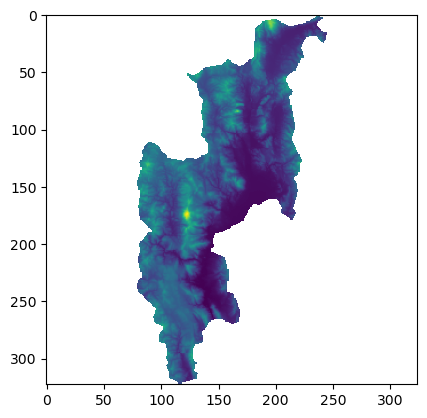

In [2]:
z_data = df_chiangmai_joined[['lat', 'lon', 'dem']].pivot_table(values='dem', index='lat', columns='lon', aggfunc='mean').values
nrows, ncols = z_data.shape
if ncols <= nrows:
    pad_size = round((nrows-ncols)/2)
    z_data = np.pad(z_data, pad_width=((0, 0), (pad_size, pad_size)),mode='constant', constant_values=np.nan)
plt.imshow(np.flip(z_data, axis=0))


In [3]:


fig = go.Figure(data=[go.Surface(z=z_data)])

fig.update_layout(title='Chiangmai - Elevation Map', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
map_range = np.max(z_data.shape)
fig.update_scenes(
    xaxis_range=[0, map_range],
    yaxis_range=[0, map_range],
    zaxis_range=[0, 30000])

fig.show()